In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Extra or EDA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score


#warning
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data_frame = pd.read_csv('heartdisease.csv')

In [3]:
data_frame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data_frame['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [5]:
data_frame['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [6]:
data_frame['RestingECG'].value_counts()


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [7]:
data_frame['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [8]:
data_frame['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Sex'] = le.fit_transform(data_frame['Sex'])

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['ChestPainType'] = le.fit_transform(data_frame['ChestPainType'])

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['ExerciseAngina'] = le.fit_transform(data_frame['ExerciseAngina'])

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['RestingECG'] = le.fit_transform(data_frame['RestingECG'])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['ST_Slope'] = le.fit_transform(data_frame['ST_Slope'])

In [14]:
data_frame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [15]:
data_frame.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [16]:
# plt.figure(figsize=(6,6))
# sns.heatmap(data_frame,annot=True)

In [17]:
X=data_frame.drop(['HeartDisease'],axis=1)
Y=data_frame['HeartDisease']

In [18]:
std = StandardScaler()
X_ = std.fit_transform(X)

In [19]:
X_,Y

(array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
         -0.83243239,  1.05211381],
        [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
          0.10566353, -0.59607813],
        [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
         -0.83243239,  1.05211381],
        ...,
        [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
          0.29328271, -0.59607813],
        [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
         -0.83243239, -0.59607813],
        [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
         -0.83243239,  1.05211381]]),
 0      0
 1      1
 2      0
 3      1
 4      0
       ..
 913    1
 914    1
 915    1
 916    1
 917    0
 Name: HeartDisease, Length: 918, dtype: int64)

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [21]:
X_train.shape,X_test.shape,X.shape

((734, 11), (184, 11), (918, 11))

In [22]:
def model_runner(model, X_train, Y_train, X_test, Y_test):
    model_r = model
    model_r.fit(X_train, Y_train)
    predicted_ = model_r.predict(X_test)
    print(classification_report(predicted_, Y_test))

In [23]:
model_lg=model_runner(LogisticRegression(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        86
           1       0.82      0.90      0.86        98

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [24]:
model_dtc=model_runner(DecisionTreeClassifier(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        87
           1       0.79      0.88      0.83        97

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



In [25]:
model_rfc=model_runner(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        81
           1       0.89      0.92      0.90       103

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [26]:
model_Knn=model_runner(KNeighborsClassifier(), X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        88
           1       0.69      0.77      0.73        96

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.70      0.70      0.70       184



In [27]:
model_bg=model_runner(BaggingClassifier(base_estimator=RandomForestClassifier()), 
             X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        81
           1       0.89      0.92      0.90       103

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [28]:
estimators = [('lg', LogisticRegression()), 
              ('knn', KNeighborsClassifier()), 
              ('Dt', DecisionTreeClassifier()),
              ('rf', RandomForestClassifier()), 
              ('bg', BaggingClassifier(base_estimator=RandomForestClassifier()))]

model_runner(VotingClassifier(estimators=estimators, voting='hard'),
             X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        83
           1       0.88      0.93      0.90       101

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [29]:
model_runner(VotingClassifier(estimators=estimators, voting='soft'),
             X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        83
           1       0.87      0.92      0.89       101

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [30]:
rf_model=RandomForestClassifier()


In [31]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [32]:
pred_rf = rf_model.predict(X_test)

In [33]:
pred_rf

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [34]:
clf=classification_report(pred_rf,Y_test)
print(clf)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        81
           1       0.88      0.91      0.90       103

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [35]:
from sklearn.metrics import confusion_matrix

<IPython.core.display.Javascript object>

<AxesSubplot:>

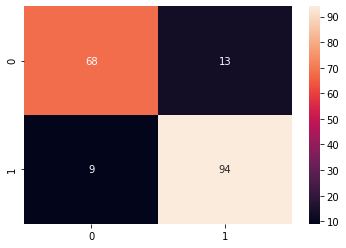

In [36]:
cm= confusion_matrix(pred_rf,Y_test)
sns.heatmap(cm,annot=True)

In [37]:
#we have to predict the new data by using  from  test data prediction 
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,0,1,140,195,0,1,179,0,0.0,2
30,53,1,2,145,518,0,1,130,0,0.0,1
377,65,1,0,160,0,1,2,122,0,1.2,1
535,56,1,0,130,0,0,0,122,1,1.0,1
807,54,1,1,108,309,0,1,156,0,0.0,2


In [38]:
new_data=rf_model.predict([[50,1,2,120,100,1,1,150,0,1.2,2]])

In [39]:
new_data

array([0], dtype=int64)

In [40]:
rf_model_train=RandomForestClassifier()

In [41]:
rf_model_train.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:
pred_rf_train = rf_model_train.predict(X_train)

In [43]:
pred_rf_train

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [44]:
clf=classification_report(pred_rf_train,Y_train)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       401

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



<IPython.core.display.Javascript object>

<AxesSubplot:>

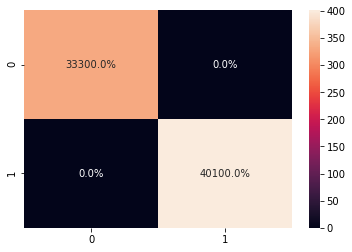

In [45]:
cm= confusion_matrix(pred_rf_train,Y_train)
sns.heatmap(cm,annot=True,fmt='0.1%')

In [46]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [49]:
new_data=rf_model.predict([[55,0,2,120,153,0,1,125,1,1.0,1]])
for i in new_data:
    if i==0:  
        print('This person does not have heart disease')
    else:
        print('This person have heart diseased')

This person have heart diseased
